In [1]:
# TERM PROJECT - Big Data
# Course name: AMOD 5410H Big Data
# Course Instructor: Brian Srivastava
# Studend ID\# 0698360 - RAJAT DAXESH DESAI
# Student ID\# 0692165 - JIMISH PRAMOD KHOLAPURE


In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import timeit

# importing the data from the csv file.
# there are 280K+ rows in the dataset.
# thus it would be time consuming to import all the rows
# so we'll just grab some rows from the dataset to get the knowledge about the data
# importing and storing the data into a pandas dataframe.

credit_data = pd.read_csv("E:/AMOD_5410H_Big_Data/Term_Project/creditcard.csv")

#pre-processing the data
# getting to know the schema or summary of the dataframe
# displaying first 5 rows of the imported data
credit_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Performing Preprocessing and Exploratory Data Analysis

In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# from the above displayed data from the head, we can see that for us
# Class attribute is the attribute that helps machine to learn the model
# It has values of 0 and 1
# Lets find out how many values each class has
credit_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:

credit_data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [6]:
valid_transaction = len(credit_data[credit_data.Class == 0])
fraud = len(credit_data[credit_data.Class == 1])
fraud_percent = (fraud / (fraud + valid_transaction)) * 100

print("Number of Genuine transactions: ", valid_transaction)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


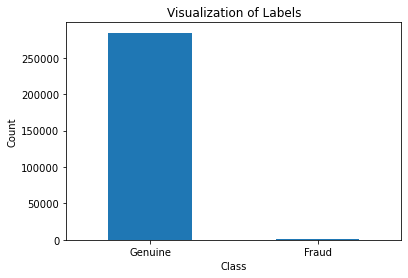

In [7]:
# Visualizing the dataset into Genuine and Fraud labels

labels = ["Genuine", "Fraud"]
count_classes = credit_data.value_counts(credit_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [8]:
credit_data["Amount"].head(5)

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [9]:
credit_data["Time"].head(5)

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64

In [10]:
# Duplicating the data and taking a fraction of the whole dataset
credit_data_duplicate = pd.read_csv("E:/AMOD_5410H_Big_Data/Term_Project/creditcard.csv", nrows = 50000)

In [11]:
credit_data_duplicate.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
credit_data_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  int64  
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22

The above dataset is not standardized. In other words the feature "Amount" needs to be in some range rather than having different values.


Thus, we'll perform Scaling. Here, we're performing standard scaling of the data. 

# Scaling of the dataset

In [13]:
# Perform Scaling
scaler = StandardScaler()
credit_data_duplicate["NormalizedAmount"] = scaler.fit_transform(credit_data_duplicate["Amount"].values.reshape(-1, 1))
credit_data_duplicate.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,NormalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.222734
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.358000
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.128004
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.119496
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.092000


In [14]:
credit_data_duplicate.drop(["Amount", "Time"], inplace= True, axis=1)
credit_data_duplicate.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.222734
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.358000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.128004
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.119496
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.092000


In [15]:
# Separating the dataframe into feature data and the target data.

y = credit_data_duplicate['Class']
X = credit_data_duplicate.drop(['Class'], axis=1)


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.222734
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.358000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.128004
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.119496
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.092000


In [18]:
# Split the data
(train_X, test_X, train_Y, test_Y) = train_test_split(X, y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)
print("Shape of train_Y: ", train_Y.shape)
print("Shape of test_Y: ", test_Y.shape)

Shape of train_X:  (35000, 29)
Shape of test_X:  (15000, 29)
Shape of train_Y:  (35000,)
Shape of test_Y:  (15000,)


In [19]:
# The below function is directly taken from the scikit-learn website to plot the confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [20]:
%%time
# Random Forest

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

Wall time: 10.7 s


In [21]:
# Print scores of our classifiers

print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.94666666666666


In [22]:
%%time
# Plot confusion matrix for Random Forests

confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[14947     1]
 [    7    45]]
Wall time: 9.97 ms


Confusion matrix, without normalization


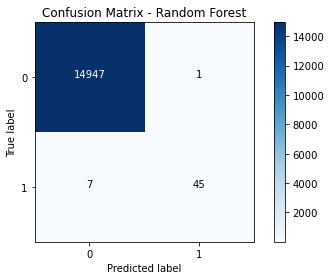

In [23]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [24]:
# The below function prints the following necesary metrics

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
    

In [25]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99947
Precision: 0.97826
Recall: 0.86538
F1-score: 0.91837


Here we have used fractional data from the whole dataset, so as to check if the classification techniques that we apply, run properly on the fractional part of the data, and then determine the acccuracy of the model, in order to select the classfication technique that should be used to develop the Fraud Detectionn Model. 

Thus, from this we see that there are only 492 observations for Class with value 1
While there are 284315 observations for Class with value 0. Here class with value 1 is for fraudulent transactions while 0 is for genuine transactions.
If we clearly observe our dataset suffers a serious problem of class imbalance. The genuine (not fraud) transactions are more than 99% with the fraud transactions constituting of 0.17%.

With such kind of distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there are more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques. Over sampling is one of them.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model.

Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.


# Applying SMOTE Method for working with the under-sampled data

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
%matplotlib inline

# Performing oversampling technique SMOTE on Random Forest

In [27]:
%%time
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (99704, 29)
Resampled shape of Y:  (99704,)
Counter({0: 49852, 1: 49852})
Wall time: 162 ms


# Build the Random Forest classifier on the new dataset

Confusion Matrix - Random Forest
[[15056     5]
 [    2 14849]]
Confusion matrix, without normalization
Evaluation of Random Forest Model

Accuracy: 0.99977
Precision: 0.99966
Recall: 0.99987
F1-score: 0.99976
Wall time: 43.4 s


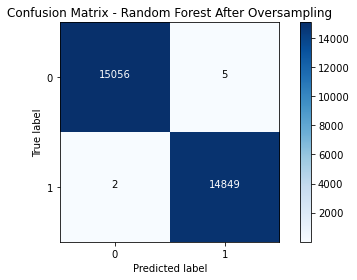

In [30]:
%%time
def RFC_model():
    rf_resampled = RandomForestClassifier(n_estimators = 100)
    rf_resampled.fit(train_X, train_Y)
    predictions_resampled = rf_resampled.predict(test_X)
    random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100
    
    
    # Visualize the confusion matrix

    cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
    print("Confusion Matrix - Random Forest")
    print(cm_resampled)
    plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")
    
    print("Evaluation of Random Forest Model")
    print()
    metrics(test_Y, predictions_resampled.round())
RFC_model()


From the above the scores of evaluation we can clearly observe that after addressing the class imbalance problem by appying SMOTE technique, Random Forest Classifier performs extremely better than the  Random Forest Classifier without SMOTE technique.

#  Support Vector Machine (SVM) classification

In [31]:

# importnig libraries for SVM
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

In [32]:
%%time
svm = SVC()
svm.fit(train_X, train_Y)

prediction_svm = svm.predict(test_X)
svm_score = svm.score(test_X,test_Y)*100

Wall time: 1min 6s


In [33]:
# Visualize the confusion matrix

cm_resampled_svm = confusion_matrix(test_Y, prediction_svm.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled_svm)

Confusion Matrix - Random Forest
[[14953   108]
 [  160 14691]]


Confusion matrix, without normalization


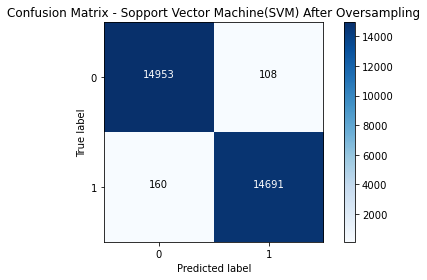

In [35]:
plot_confusion_matrix(cm_resampled_svm, classes=[0, 1], title= "Confusion Matrix - Sopport Vector Machine(SVM) After Oversampling")

In [37]:
print("Evaluation of SVM Model")
print()
metrics(test_Y, prediction_svm.round())

Evaluation of SVM Model

Accuracy: 0.99104
Precision: 0.99270
Recall: 0.98923
F1-score: 0.99096


#  Logistic Regression Classification

In [38]:
# importing library for Logistic Regression model
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV

Applying Hyper Parameter Tuning to perform Logistic Regression Classification using Grid Search CV

In [39]:
%%time
logistic = LogisticRegression()

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100] 
penalty = ['l1', 'l2'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
solver = ['liblinear', 'saga'] 
param_grid = dict(penalty=penalty, 
C=C, 
class_weight=class_weight, 
solver=solver) 

grid = GridSearchCV(estimator=logistic, 
param_grid=param_grid, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 
grid_result = grid.fit(train_X, train_Y) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Score:  0.9986357946530464
Best Params:  {'C': 100, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1', 'solver': 'liblinear'}
Wall time: 5min 5s


Applying Hyper Parameter Tuning to perform Stochastic Gradient Descent Classification using Random Search CV

In [40]:
# Hyper Paramter Tuning
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  
'perceptron']
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, 
penalty=penalty, 
alpha=alpha, 
learning_rate=learning_rate, 
class_weight=class_weight, 
eta0=eta0)

# Stochastic Gradient Descent Classification (SDGClassification)

In [41]:
%%time 
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 
sgd = SGDClassifier(loss="hinge", penalty="l2") 
random = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring='roc_auc', 
verbose=1, n_jobs=-1, 
n_iter=1000) 
random_result = random.fit(train_X, train_Y) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9986679431941579
Best Params:  {'penalty': 'l2', 'loss': 'modified_huber', 'learning_rate': 'adaptive', 'eta0': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'alpha': 0.0001}
Wall time: 19min 37s



From the above classification models we can observe that Random Forest Classification Teechnique after performing SMOTE has the highest rate of accuracy, i.e. the highest rate of determining fraudulent transactions accurately with the highest precision, recall and the highest f1-score. It also has the lowest run time for the machine.



Thus, we'll select Random Forest Classification Technique after the application of SMOTE sampling on the data, to classify the fraudulent transactions.  
Also, we'll deploy the data into Kafka so as to stream the real time data into the model and determine the authenticity of each transactions.

Confusion Matrix - Random Forest
[[15056     5]
 [    2 14849]]
Confusion matrix, without normalization
Evaluation of Random Forest Model

Accuracy: 0.99977
Precision: 0.99966
Recall: 0.99987
F1-score: 0.99976


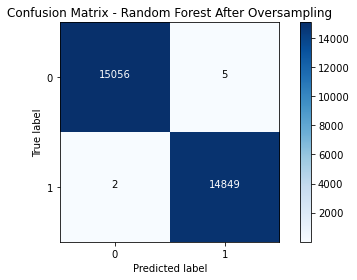

In [42]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(RFC_model(), open(filename, 'wb'))